In [1]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import mplfinance as mpf

In [3]:
# importing data set 
data=pd.read_csv(r"G:\Tutors club internship\itc.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-21,214.000000,215.449997,211.050003,212.500000,202.940292,19395604
1,2021-12-22,214.000000,214.199997,211.100006,212.000000,202.462799,17239484
2,2021-12-23,213.899994,218.449997,213.199997,217.300003,207.524368,22209720
3,2021-12-24,218.000000,220.449997,216.449997,218.000000,208.192871,16581585
4,2021-12-27,218.399994,218.449997,215.649994,217.550003,207.763123,8153106


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
244,2022-12-14,346.000000,347.350006,343.750000,345.399994,345.399994,7379878
245,2022-12-15,344.750000,346.100006,338.000000,338.850006,338.850006,8154931
246,2022-12-16,337.500000,338.899994,331.299988,335.100006,335.100006,12429280
247,2022-12-19,336.799988,342.350006,335.350006,340.500000,340.500000,7812801
248,2022-12-20,340.049988,340.950012,336.750000,340.149994,340.149994,5481876


# Basic informations

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,282.952009,285.803615,280.438353,283.243172,280.165844,1.701174e+07
std,46.132542,46.080964,45.784289,45.830716,49.058991,1.040145e+07
min,210.000000,213.300003,207.000000,208.500000,202.271790,3.170564e+06
25%,245.899994,250.750000,243.800003,249.199997,243.488602,9.991052e+06
50%,272.950012,275.000000,270.000000,273.500000,271.850006,1.436197e+07
75%,330.600006,333.299988,328.000000,330.899994,330.899994,2.004473e+07
max,360.000000,361.450012,354.649994,360.700012,360.700012,7.828771e+07


In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Visualization

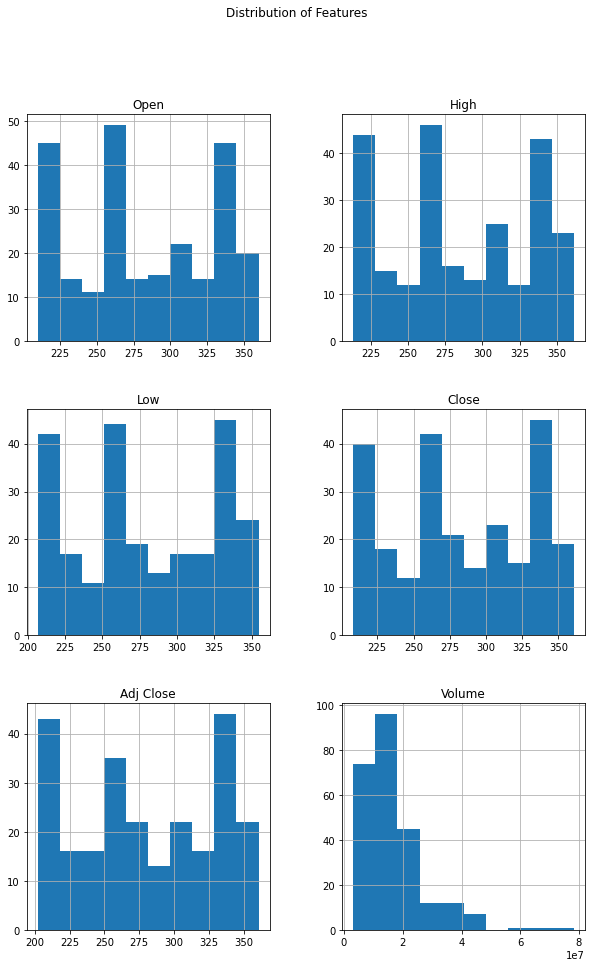

In [10]:
data.hist(figsize=(10,15))
plt.suptitle('Distribution of Features')
plt.show()

In [11]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
# creating a copy of data set for more visualisation
df=data.copy()

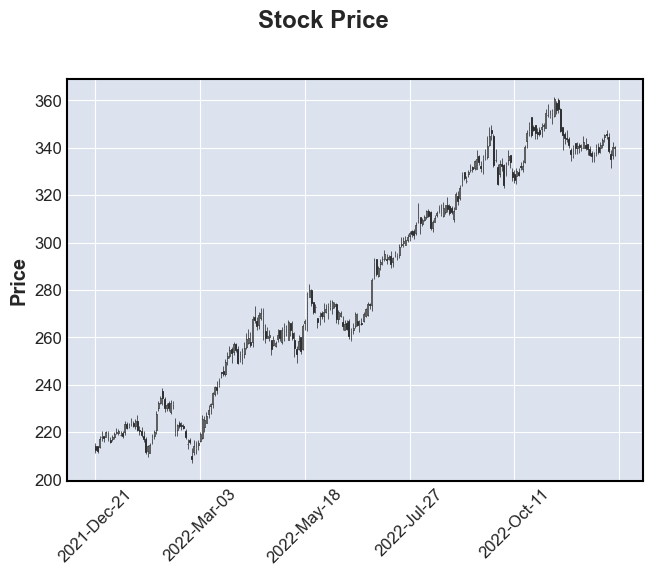

In [13]:
data.set_index('Date',inplace=True)
data.index = pd.to_datetime(data.index)
# Create a candlestick plot
mpf.plot(data, type="candlestick", title="Stock Price")


Text(0, 0.5, 'close price')

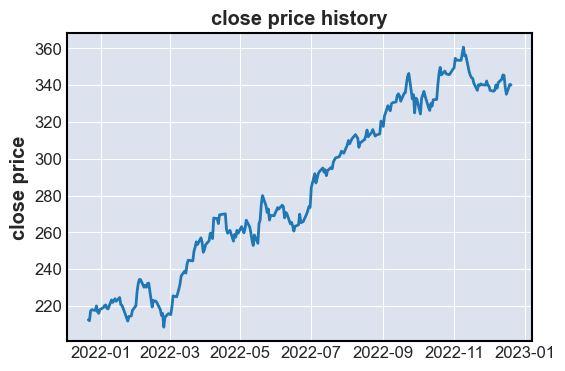

In [14]:
plt.figure(figsize=(6,4))
plt.plot(data['Close'])
plt.title("close price history",fontweight="bold")
plt.ylabel("close price",fontweight="bold")


In [15]:
# converting to date time format
df["Date"] = pd.to_datetime(df["Date"])

# Extract the month and date from the "Date" column
df["Month"] = df["Date"].dt.month
df["Date"] = df["Date"].dt.day

# The DataFrame now has "Month" and "Date" columns
print(df)

     Date        Open        High         Low       Close   Adj Close  \
0      21  214.000000  215.449997  211.050003  212.500000  202.940292   
1      22  214.000000  214.199997  211.100006  212.000000  202.462799   
2      23  213.899994  218.449997  213.199997  217.300003  207.524368   
3      24  218.000000  220.449997  216.449997  218.000000  208.192871   
4      27  218.399994  218.449997  215.649994  217.550003  207.763123   
..    ...         ...         ...         ...         ...         ...   
244    14  346.000000  347.350006  343.750000  345.399994  345.399994   
245    15  344.750000  346.100006  338.000000  338.850006  338.850006   
246    16  337.500000  338.899994  331.299988  335.100006  335.100006   
247    19  336.799988  342.350006  335.350006  340.500000  340.500000   
248    20  340.049988  340.950012  336.750000  340.149994  340.149994   

       Volume  Month  
0    19395604     12  
1    17239484     12  
2    22209720     12  
3    16581585     12  
4     81

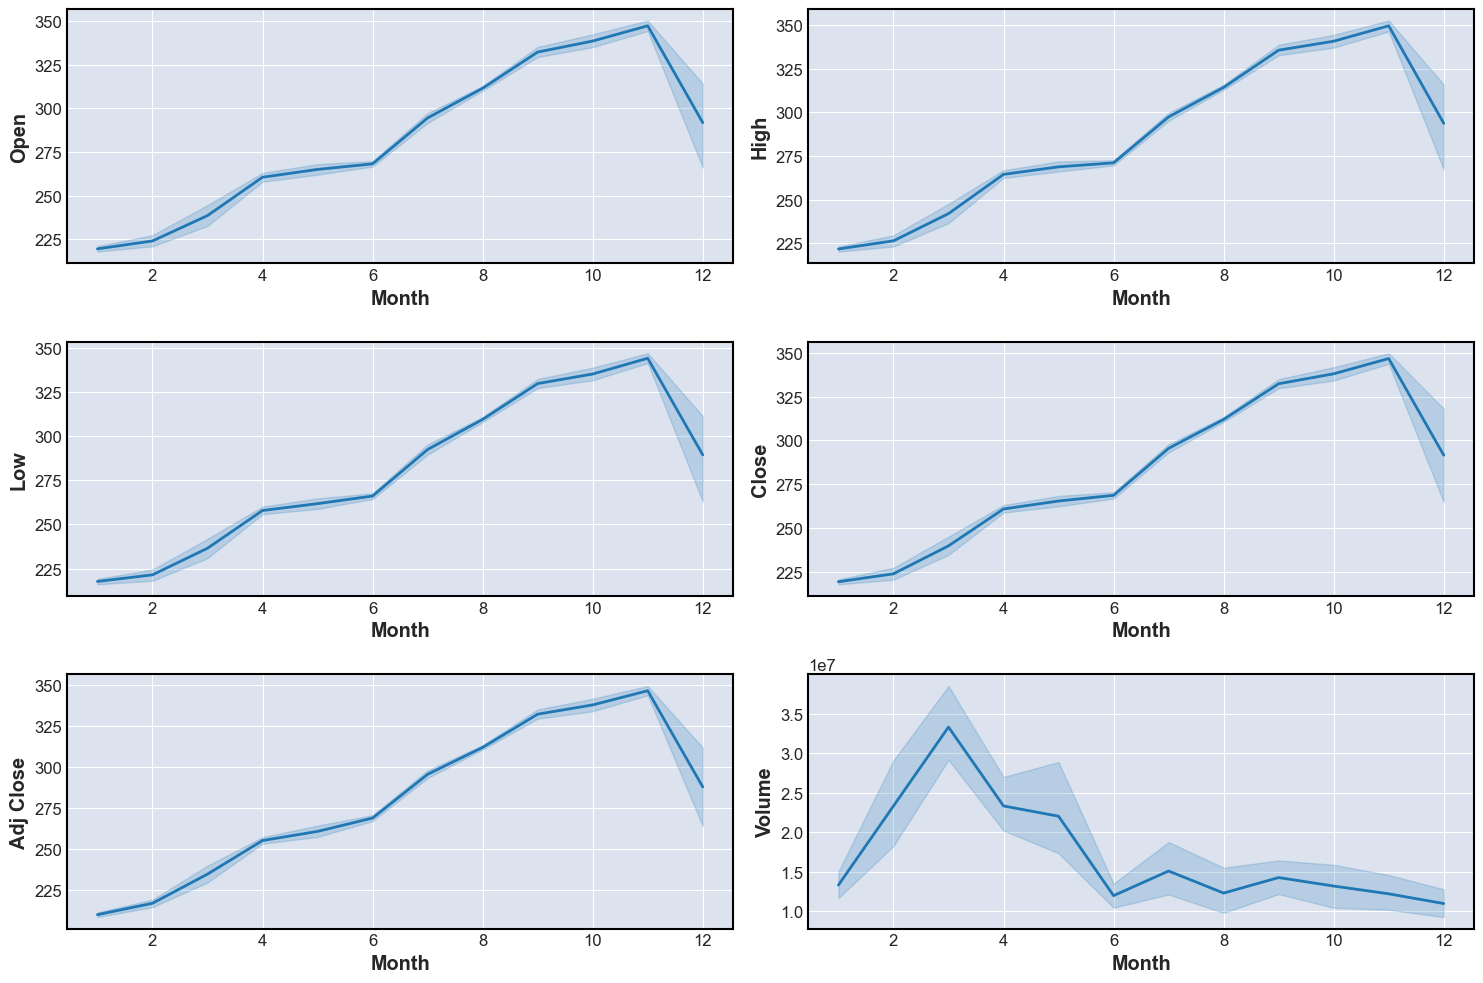

In [16]:
import seaborn as sns
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
c=df.drop(['Date','Month'],axis=1)
for i, subplot in zip(c,ax.flatten()):
    sns.lineplot(x=df['Month'], y= df[i], ax=subplot)
plt.tight_layout()

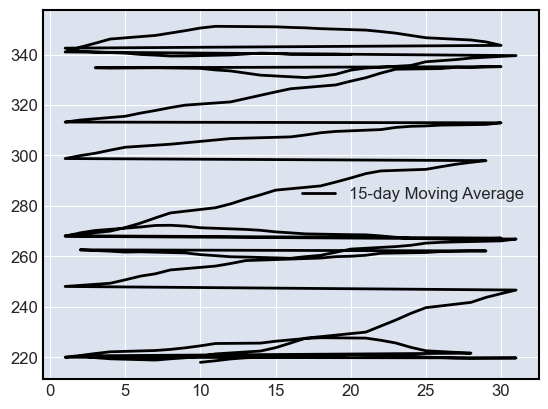

In [17]:
# Plot the stock price and moving average
df["15ma"] = df["Close"].rolling(15).mean()
plt.plot(df["Date"], df["15ma"], label="15-day Moving Average",color="black")
plt.legend()
plt.show()

Text(0.5, 1.0, 'ITC')

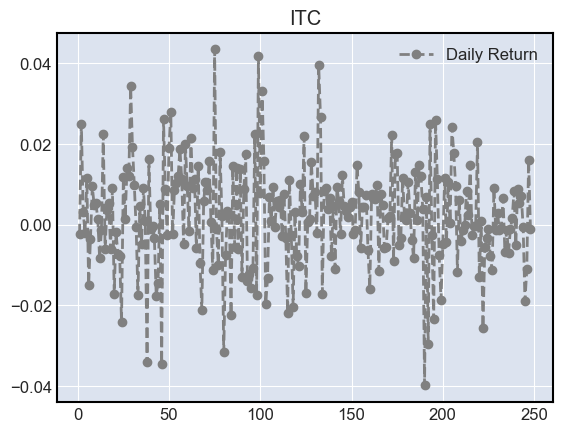

In [18]:
# ploting the daily returns
df['Daily Return'] = df['Adj Close'].pct_change()
df['Daily Return'].plot( legend=True, linestyle='--', marker='o',color="grey").set_title('ITC')

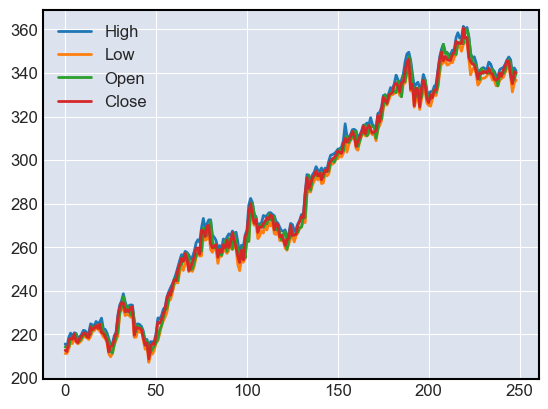

In [43]:
# Plot the high, low, open, and close values
df[["High", "Low", "Open", "Close"]].plot()

# Show the plot
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data1 = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data1.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

212

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02628121],
       [0.02299606],
       [0.05781867],
       [0.06241787],
       [0.05946125],
       [0.075887  ],
       [0.05420499],
       [0.04927726],
       [0.0627464 ],
       [0.06964524],
       [0.07720105],
       [0.07917216],
       [0.06701706],
       [0.06504595],
       [0.09724049],
       [0.08837054],
       [0.0936268 ],
       [0.10151114],
       [0.09264129],
       [0.1057819 ],
       [0.0804862 ],
       [0.07785811],
       [0.06734559],
       [0.0561761 ],
       [0.02168202],
       [0.03810777],
       [0.04007888],
       [0.05978979],
       [0.07687251],
       [0.12647831],
       [0.1553876 ],
       [0.17049931],
       [0.1695138 ],
       [0.14257553],
       [0.14947436],
       [0.14224699],
       [0.15604467],
       [0.15735871],
       [0.07194478],
       [0.09526937],
       [0.0936268 ],
       [0.09296973],
       [0.088042  ],
       [0.06241787],
       [0.04172146],
       [0.04894873],
       [0.        ],
       [0.035

In [34]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02628121, 0.02299606, 0.05781867, 0.06241787, 0.05946125,
       0.075887  , 0.05420499, 0.04927726, 0.0627464 , 0.06964524,
       0.07720105, 0.07917216, 0.06701706, 0.06504595, 0.09724049,
       0.08837054, 0.0936268 , 0.10151114, 0.09264129, 0.1057819 ])]
[0.08048619601948515]

[array([0.02628121, 0.02299606, 0.05781867, 0.06241787, 0.05946125,
       0.075887  , 0.05420499, 0.04927726, 0.0627464 , 0.06964524,
       0.07720105, 0.07917216, 0.06701706, 0.06504595, 0.09724049,
       0.08837054, 0.0936268 , 0.10151114, 0.09264129, 0.1057819 ]), array([0.02299606, 0.05781867, 0.06241787, 0.05946125, 0.075887  ,
       0.05420499, 0.04927726, 0.0627464 , 0.06964524, 0.07720105,
       0.07917216, 0.06701706, 0.06504595, 0.09724049, 0.08837054,
       0.0936268 , 0.10151114, 0.09264129, 0.1057819 , 0.0804862 ])]
[0.08048619601948515, 0.07785811475494486]



In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

192/192 [==============================] - 6s 11ms/step - loss: 0.0115


In [36]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 20: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 8ms/step


5.928689269531972

C:\Users\USER\AppData\Local\Temp/ipykernel_32/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


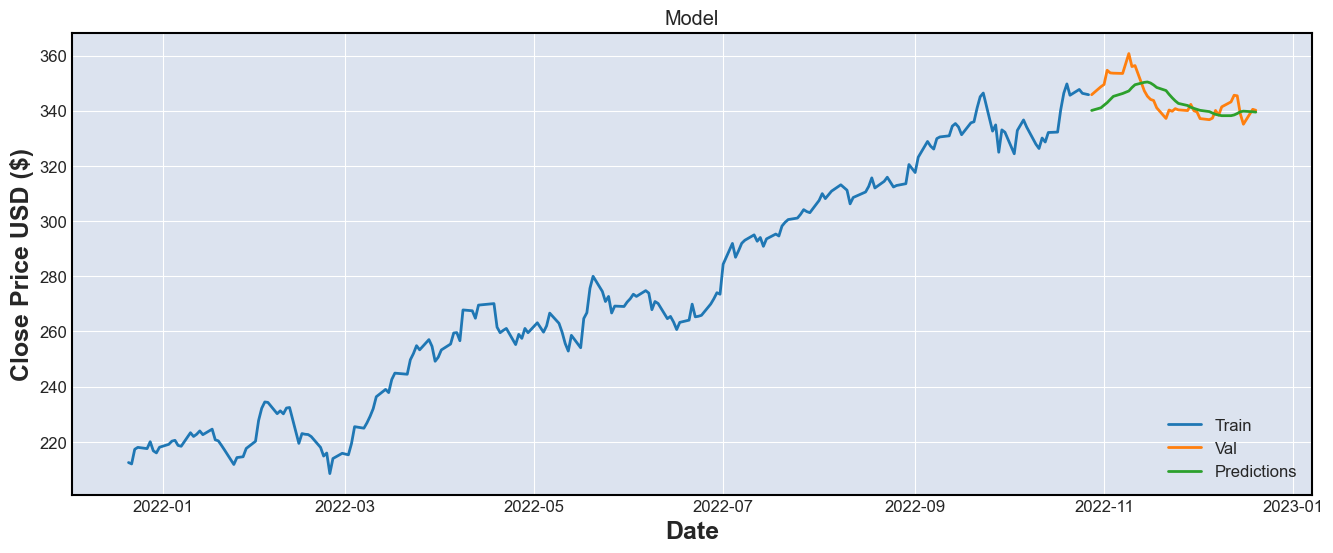

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
# Show the valid and predicted prices
valid

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2022-10-28,347.549988,348.600006,345.100006,345.799988,345.799988,13069167,340.089600
2022-10-31,348.000000,350.500000,344.750000,348.700012,348.700012,13825970,341.062103
2022-11-01,349.250000,350.500000,347.200012,349.500000,349.500000,19665200,342.001160
2022-11-02,348.500000,356.250000,348.500000,354.649994,354.649994,16781507,342.909363
2022-11-03,354.000000,358.500000,353.000000,353.700012,353.700012,10736155,344.068390
2022-11-04,354.000000,356.000000,352.500000,353.600006,353.600006,8386849,345.195740
2022-11-07,355.000000,356.350006,350.000000,353.500000,353.500000,10050303,346.232788
2022-11-09,353.500000,361.450012,353.200012,360.700012,360.700012,20611075,347.151001
2022-11-10,359.000000,359.899994,354.100006,356.000000,356.000000,19327625,348.392059
